In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
!pip install TurkishStemmer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from TurkishStemmer import TurkishStemmer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# get the e-com data
filepath = '/content/drive/MyDrive/e-com.csv'
e_comdf = pd.read_csv(filepath,  delimiter=";") 
e_comdf.head(10)

Metin  Durum
0                              evet anlatıldığı gibi      1
1  Daha öncede almıştım bu cihazdan ense ve sakal...      1
2  Ürün gayet başarılı sakal kesmede başlık sayıs...      1
3  Daha öncede aynısını almıştım çok güzel ve kal...      1
4  Erkek kuaförüyüm ense ve sıfır sakal traşı içi...      1
5                           ürün gerçekten çok güzel      1
6  Ürün beklediğimden güzel çıktı gayet kullanışl...      1
7                        güzel makina tavsiye ederim      1
8          tavsiye edebileceğim çok güzel bir makina      1
9  ürün geldiğinde şarjı vardı. ilk lullanım önce...      1

In [ ]:
# EDA (exploratory data analysis)

In [ ]:
e_comdf.groupby('Durum').sum() 
# 0 negative 1 positive 2 neutr

Metin
Durum                                                   
0      Ürün sadece aldığım gün güzel bir şekilde kest...
1      evet anlatıldığı gibiDaha öncede almıştım bu c...
2      Ürün çalışıyor şimdilikMakine gayet iyi memnun...

<Axes: xlabel='Durum', ylabel='count'>

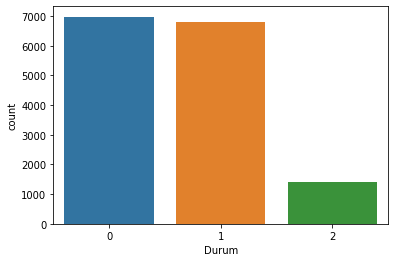

In [ ]:
sns.countplot(data=e_comdf, x=e_comdf.Durum)

In [ ]:
# get the wiki data
filepath_wiki = '/content/drive/MyDrive/train.csv'
wikidf = pd.read_csv(filepath_wiki,  delimiter=",") 
wikidf.head(10)

text     label         dataset
0  ürünü hepsiburadadan alalı 3 hafta oldu. orjin...  Positive  urun_yorumlari
1  ürünlerden çok memnunum, kesinlikle herkese ta...  Positive  urun_yorumlari
2      hızlı kargo, temiz alışveriş.teşekkür ederim.  Positive  urun_yorumlari
3               Çünkü aranan tapınak bu bölgededir .      Notr            wiki
4  bu telefonu başlıca alma nedenlerim ise elimde...  Positive  urun_yorumlari
5  telefon gayet güzel ben kırmızı aldım baya şık...  Positive  urun_yorumlari
6            Sert ve acımasız özelliklere sahiptir .      Notr            wiki
7       harika bir kokusu var ve tüm odayı sarıyor..  Positive  urun_yorumlari
8  ürün orjinal ve gerçekten fiyat performans ürü...  Positive  urun_yorumlari
9   Zaten filmde Şener Şen olması ve Türkiyenin g...  Positive           HUMIR

In [ ]:
wikidf.drop('dataset', axis=1, inplace=True)

In [ ]:
wikidf.rename(columns={'text': 'Metin', 'label': 'Durum'}, inplace=True)

In [ ]:
wikidf.Durum= wikidf.Durum.map({"Notr": 2, "Negative":0, "Positive":1 })

In [ ]:
len(wikidf)

440679

<Axes: xlabel='Durum', ylabel='count'>

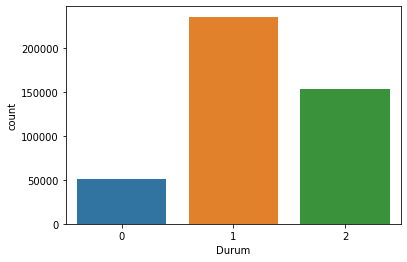

In [ ]:
sns.countplot(data=wikidf, x=wikidf.Durum)

In [ ]:
# concat 
frames = [e_comdf, wikidf]
  
df = pd.concat(frames)
df.head(10)

Metin  Durum
0                              evet anlatıldığı gibi      1
1  Daha öncede almıştım bu cihazdan ense ve sakal...      1
2  Ürün gayet başarılı sakal kesmede başlık sayıs...      1
3  Daha öncede aynısını almıştım çok güzel ve kal...      1
4  Erkek kuaförüyüm ense ve sıfır sakal traşı içi...      1
5                           ürün gerçekten çok güzel      1
6  Ürün beklediğimden güzel çıktı gayet kullanışl...      1
7                        güzel makina tavsiye ederim      1
8          tavsiye edebileceğim çok güzel bir makina      1
9  ürün geldiğinde şarjı vardı. ilk lullanım önce...      1

In [ ]:
len(df) 

455849

<Axes: xlabel='Durum', ylabel='count'>

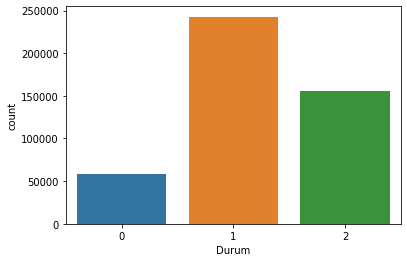

In [ ]:
sns.countplot(data=df, x=df.Durum)

In [ ]:
# stopwords
with open('stopwords.txt', 'r') as f:
    stopwords = [line.strip() for line in f]
# stopwords

In [ ]:
# Data Cleaning (Stopwords - Punctuation - Stemming)

In [ ]:
df['Metin'] = df['Metin'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stopwords))

In [ ]:
df.head()

Metin  Durum
0                                   evet anlatıldığı      1
1  Daha öncede almıştım cihazdan ense sakal tüket...      1
2  Ürün gayet başarılı sakal kesmede başlık sayıs...      1
3  Daha öncede aynısını almıştım güzel kaliteli ü...      1
4  Erkek kuaförüyüm ense sıfır sakal traşı uygun ...      1

In [ ]:
# punctuation
df['Metin'] = df['Metin'].str.replace('[^\w\s]', '', regex=False)

In [ ]:
deletetion_symbols = ['!', '[', ']','(', ')', '{', '}', '/' , '&', '@', '#', '%', '^', '*', '_']
df['Metin'] = df['Metin'].apply(lambda x: " ".join(x for x in str(x).split() if x not in deletetion_symbols))

In [ ]:
df.head()

Metin  Durum
0                                   evet anlatıldığı      1
1  Daha öncede almıştım cihazdan ense sakal tüket...      1
2  Ürün gayet başarılı sakal kesmede başlık sayıs...      1
3  Daha öncede aynısını almıştım güzel kaliteli ü...      1
4  Erkek kuaförüyüm ense sıfır sakal traşı uygun ...      1

(-0.5, 1599.5, 799.5, -0.5)

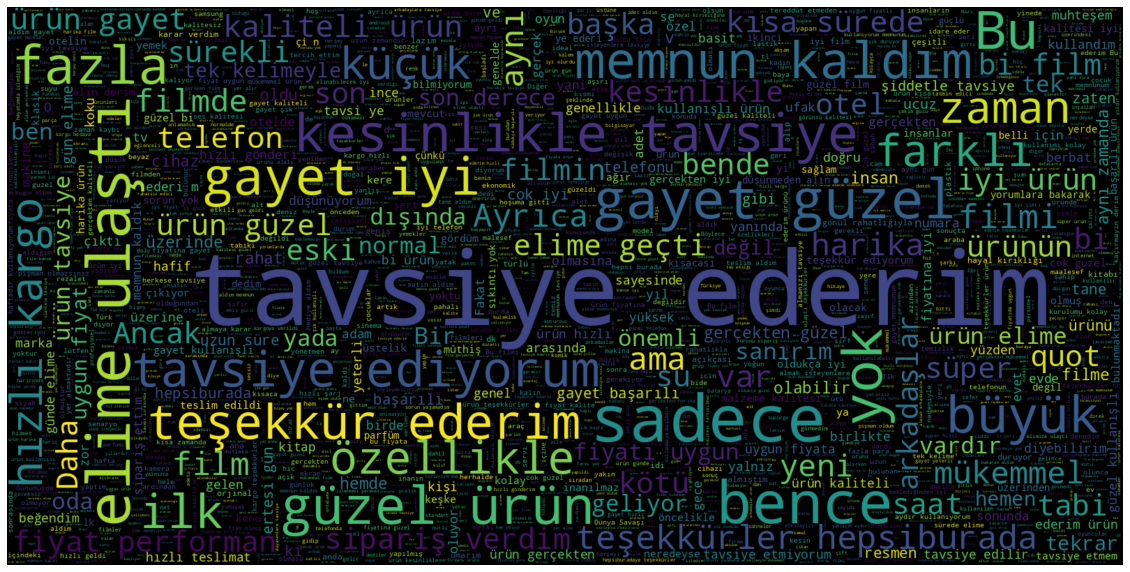

In [ ]:
# general
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df['Metin']))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

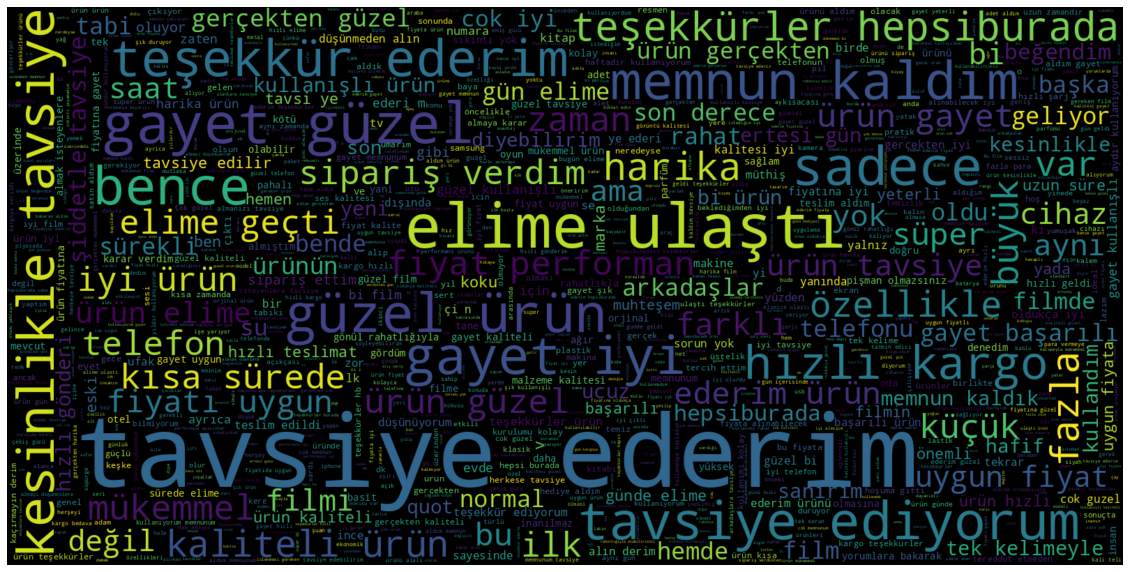

In [ ]:
# 0 negative 1 positive 2 neutr
pos = df[df['Durum'] == 1]
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(pos['Metin']))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

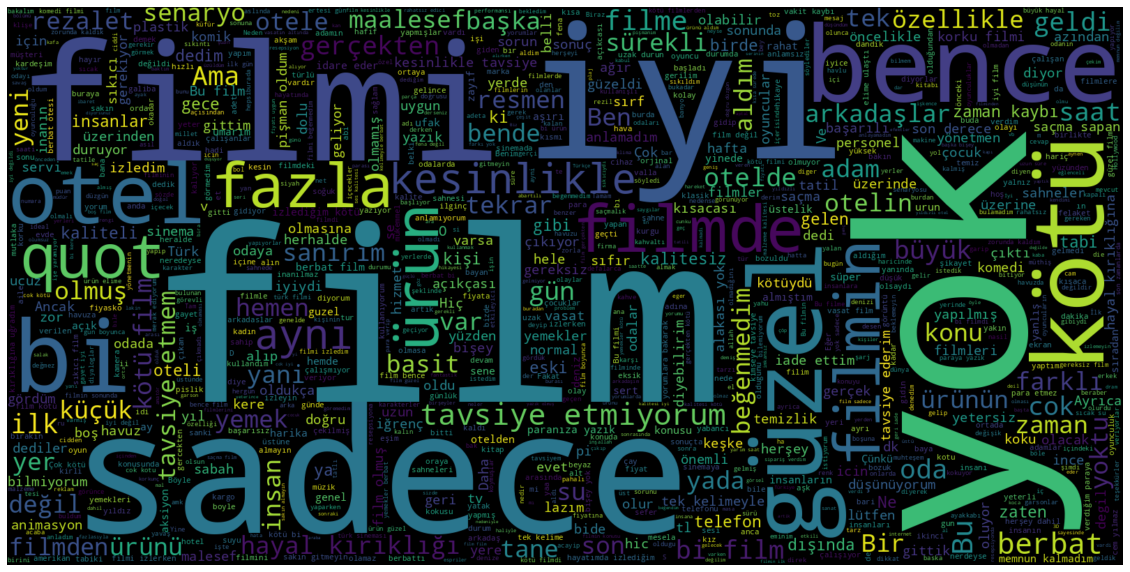

In [ ]:
neg = df[df['Durum'] == 0]
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(neg['Metin']))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

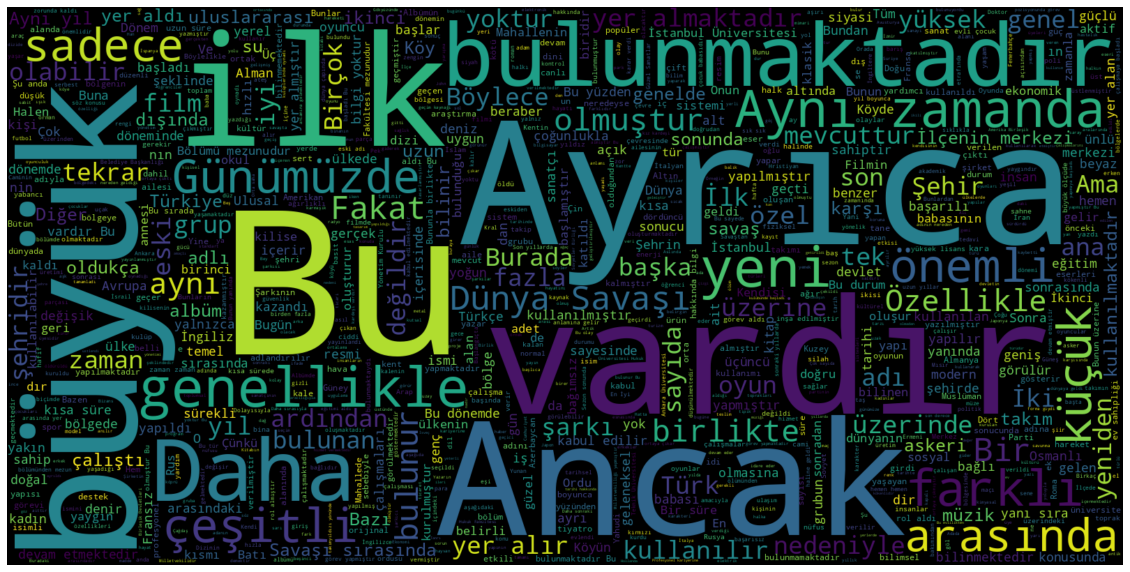

In [ ]:
net = df[df['Durum'] == 2]
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(net['Metin']))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")

In [ ]:
# stemming

In [ ]:
# from snowballstemmer import TurkishStemmer
# turkStem=TurkishStemmer()

# def stem_word(word):
#     return turkStem.stemWord(word)

In [ ]:
# df['Metin'] = df['Metin'].apply(lambda x: ' '.join([stem_word(word) for word in x.split()]))

In [ ]:
# df.head()

In [ ]:
# train test split 
X = df['Metin']
y = df['Durum']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# tf-idf and training
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import BernoulliNB, MultinomialNB
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from xgboost.sklearn import XGBClassifier
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', SVC()) 
])

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
pred = pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
print(confusion_matrix(y_test, pred))

In [ ]:
new_com= pd.Series("kargo kötüydü ama ürün mükemmeldi")


In [ ]:
pipeline.predict(new_com)